In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame
data = pd.read_excel("C:\\Users\\KOFI ADUKPO\\Downloads\\hci_acs_chas_raceincome_housingcostburden_ct_pl_co_re_st_7-30-14-ada.xlsx")



# 1. Missing Data
# Check for missing data
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)



c:\Users\KOFI ADUKPO\Desktop\code\aenv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Missing Data:
 ind_id                      0
ind_definition              3
datasource                  3
reportyear                  3
burden                      3
tenure                      3
race_eth_code               3
race_eth_name               3
income_level                3
geotype                     3
geotypevalue                3
geoname                     3
county_name               813
county_fips               813
region_name                57
region_code                57
total_households       308085
burdened_households    308085
percent                341271
LL95CI                 343438
UL95CI                 343438
SE                     343438
rse                    362757
CA_decile              488514
CA_RR                  419456
version                     3
dtype: int64


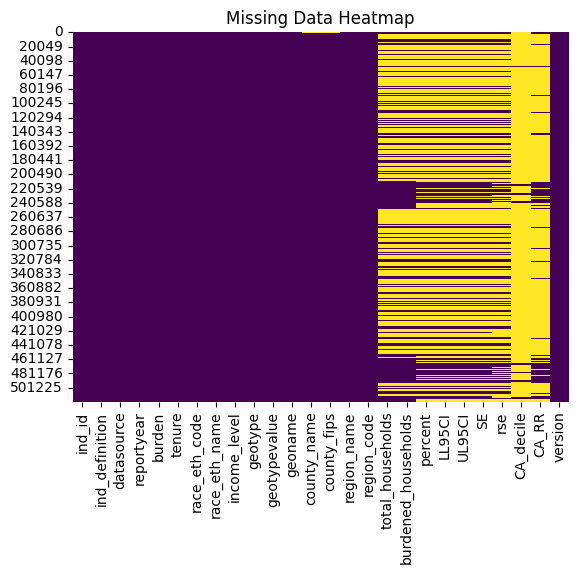

In [5]:


# Visualize missing data using a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()



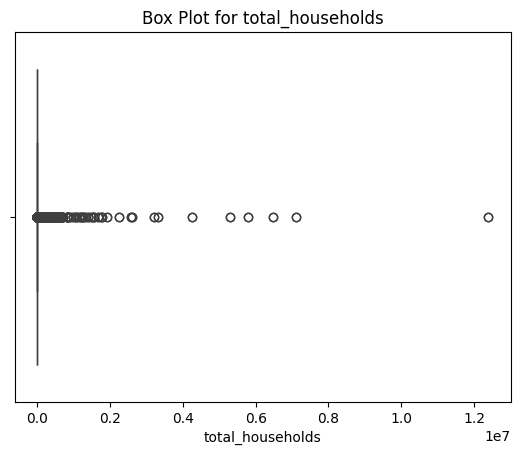

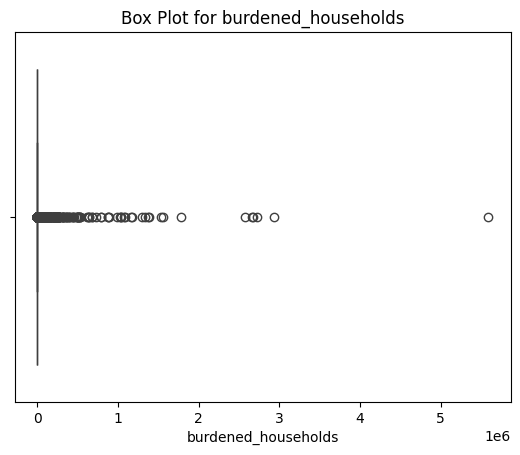

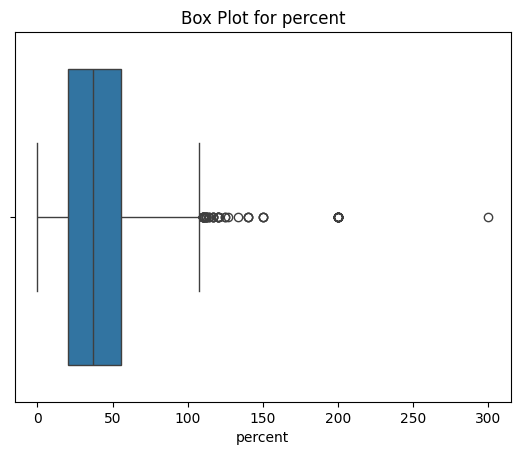

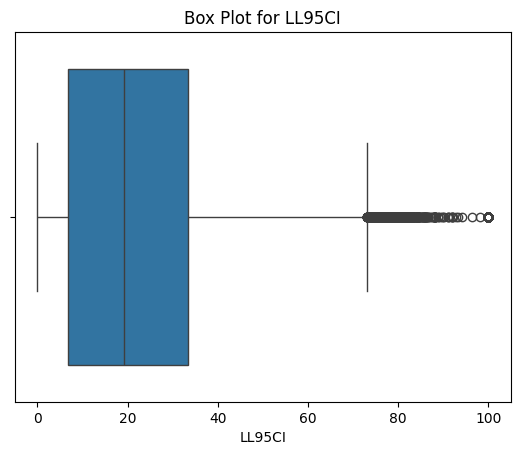

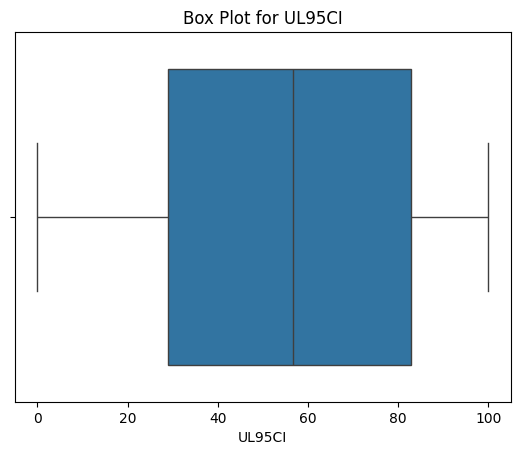

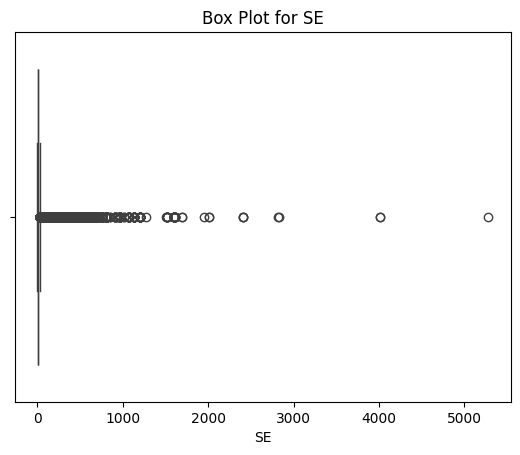

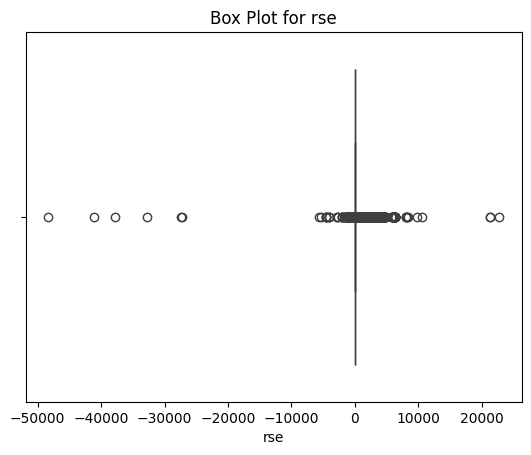

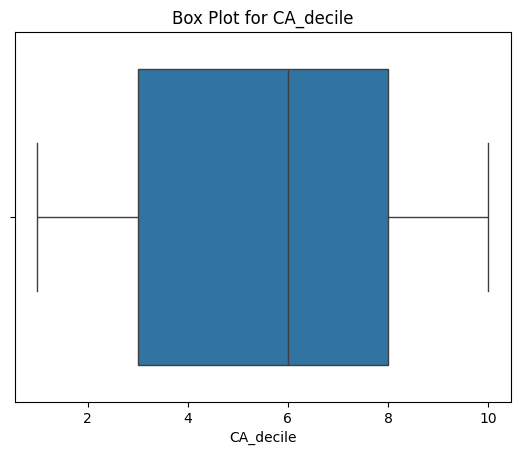

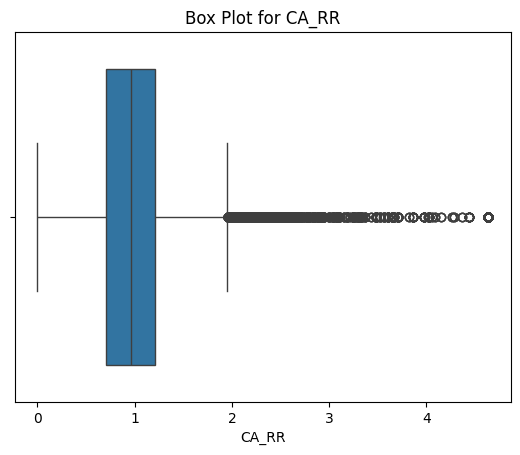

Numerical Columns with Outliers:
Index(['total_households', 'burdened_households', 'percent', 'LL95CI',
       'UL95CI', 'SE', 'rse', 'CA_decile', 'CA_RR'],
      dtype='object')


In [8]:


# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Define a threshold for outliers (e.g., using the IQR method)
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect outliers in numerical columns
outliers = numerical_columns.apply(detect_outliers)

# Visualize the box plots for numerical columns with outliers
for column in outliers.columns:
    sns.boxplot(x=numerical_columns[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

print("Numerical Columns with Outliers:")
print(outliers.columns)
